In [1]:
# importing necessary packages :>

import pandas as pd
import matplotlib.pyplot as plt
from functions import av_err, savetocsv

In [6]:
# importing data

data = pd.read_csv("Data/BGO/Am241/BGO_Am241_final.csv", 
                   nrows = 5000
                  )

In [7]:
data

,Unnamed: 0,ADC channel,average,error
0,0,-495.0,6.000000,3.000000
1,1,-485.0,7.333333,1.666667
2,2,-475.0,5.666667,3.666667
3,3,-465.0,7.333333,2.666667
4,4,-455.0,3.666667,3.333333
...,...,...,...,...
3496,3496,34465.0,0.000000,0.000000
3497,3497,34475.0,0.000000,0.000000
3498,3498,34485.0,0.000000,0.000000
3499,3499,34495.0,0.000000,0.000000


Text(0.5, 1.0, 'Counts Recorded per Channel')

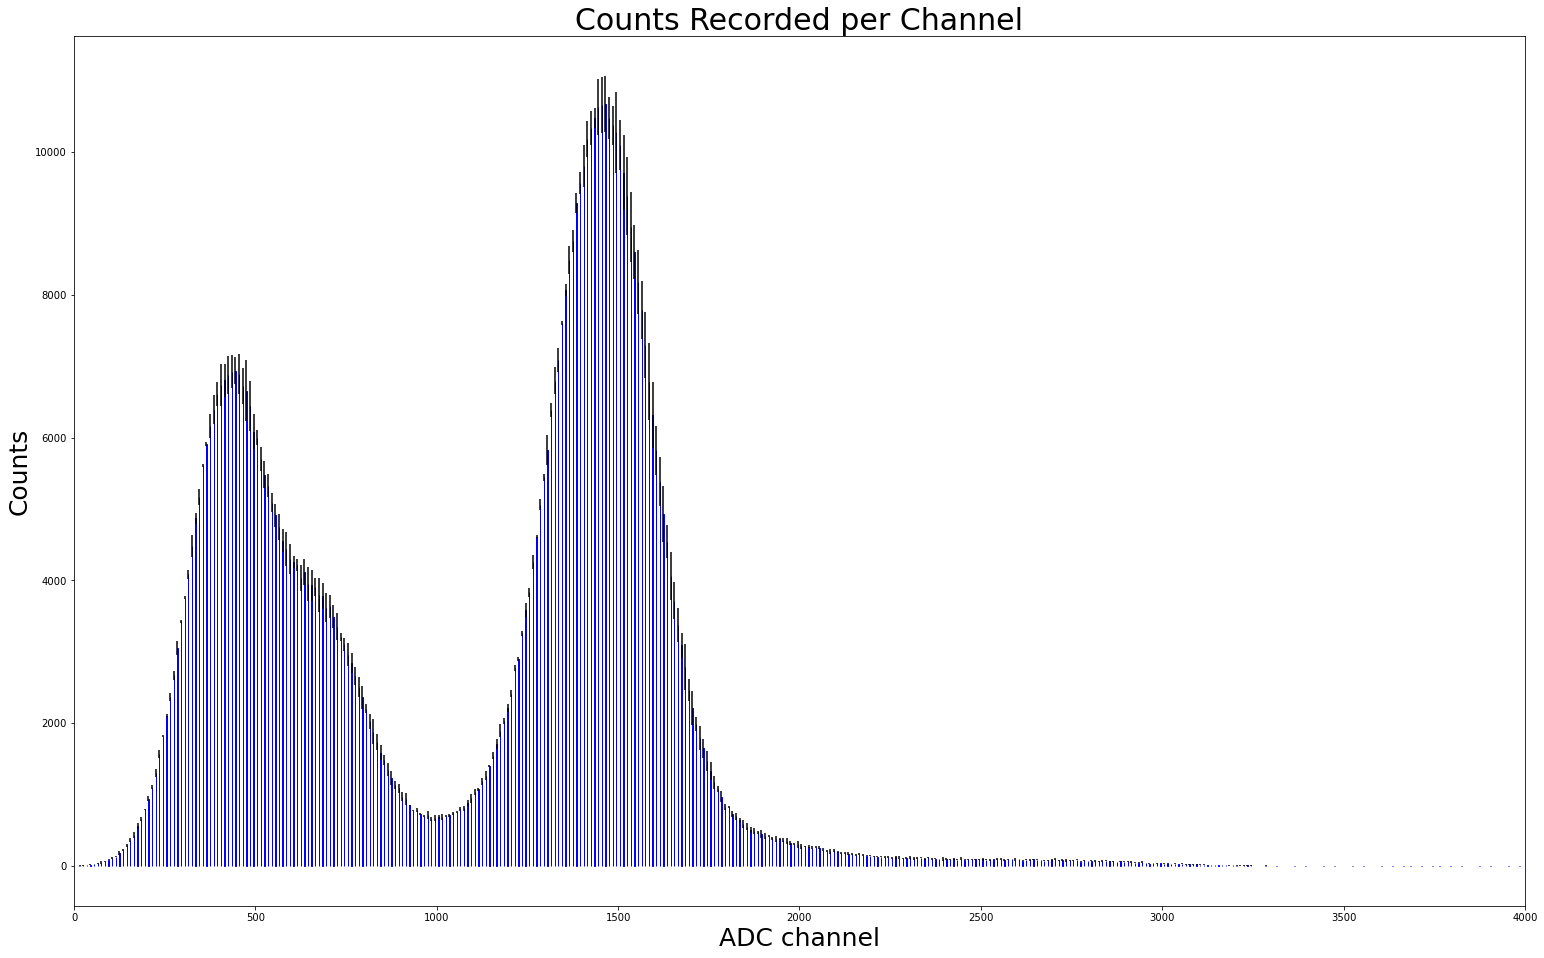

In [11]:
# creating graph
fig, ax = plt.subplots(figsize = (26,16))

# barplotting
ax.bar(x = data['ADC channel'], height = data['average'], width = 0.8, ec = 'blue', yerr = data['error'])
ax.set_xlim(xmin=0, xmax = 4000)

# labeling
plt.xlabel('ADC channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.title('Counts Recorded per Channel', fontsize = 30)